In [1]:
import pandas as pd
from ClickReaction import CuAAC
import rdkit as rk
from PIL import Image  # Import PIL for visualization
from rdkit import Chem
from IPython.display import display
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.rdMolDescriptors import CalcNumHeteroatoms
import random #library for the generation of DNA Tags
from openpyxl import Workbook
from rdkit.Chem import SDMolSupplier, SDWriter
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import IPythonConsole  # Ensures images render properly
from ClickReaction.BaseReaction import BaseReaction, Reactant, Reactants
from rdkit.Chem import PandasTools

In [78]:
import re

In [7]:
# List of building blocks in SMILES format
BB = ['N=[N+]=NCC1CCCC1', 'N=[N+]=NCc1ccccc1', 'N=[N+]=NCC1CCCCCC1']

# Convert SMILES to RDKit Mol objects
molecules = []
for i, smiles in enumerate(BB):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol.SetProp("_Name", f"BB_{i}")  # Assign a name (important for SDF)
        AllChem.Compute2DCoords(mol)  # Compute 2D coordinates
        molecules.append(mol)
    else:
        print(f"❌ Warning: Could not parse SMILES {smiles}")

# Write valid molecules to an SDF file
sdf_filename = "azides.sdf"
with Chem.SDWriter(sdf_filename) as writer:
    for mol in molecules:
        writer.write(mol)

print(f"✅ Successfully wrote {len(molecules)} molecules to {sdf_filename}")

✅ Successfully wrote 3 molecules to azides.sdf


In [84]:
# Define the electrophile (with the leaving group Br)
electrophile_smiles = 'C#CC(Br)c1ccccc1'
electrophile = Chem.MolFromSmiles(electrophile_smiles)

# Define the nucleophile (amine group with an ether group)
nucleophile_smiles = 'Nc1ccoc1'
nucleophile = Chem.MolFromSmiles(nucleophile_smiles)

# Define the SN2 reaction SMARTS pattern
reaction_smarts = '[C:1]-Br.[N:2]>>[C:1]-[N:2]'

# Create the reaction object from SMARTS
reaction = AllChem.ReactionFromSmarts(reaction_smarts)

# Perform the reaction
reactants = [electrophile, nucleophile]
product_sets = reaction.RunReactants(reactants)

# Extract the products
products = []
for product_set in product_sets:
    for product in product_set:
        products.append(product)

In [10]:
# Define the reactants as SMILES
substrate = Chem.MolFromSmiles("C#CC(Br)c1ccccc1")  # 1-bromo-2-phenylprop-1-yne
nucleophile = Chem.MolFromSmiles("Nc1ccoc1")  # 2-aminofuran

# Define the reaction using SMARTS
reaction = AllChem.ReactionFromSmarts(
    "[C:1]([Br:2])=[C:3]#[C:4].[N:5]>>[C:1]([N:5])=[C:3]#[C:4].[Br-:2]"
)

# Run the reaction
products = reaction.RunReactants((substrate, nucleophile))

# Save the products to an SDF file
writer = Chem.SDWriter("products.sdf")
for prod_set in products:
    for prod in prod_set:
        writer.write(prod)
writer.close()

print("Products saved to products.sdf")

Products saved to products.sdf


In [6]:
# Definir los nucleófilos y electrófilos
nucleofilos = [
    Chem.MolFromSmiles("Nc1ccoc1"),  # Nucleófilo con nitrógeno
    Chem.MolFromSmiles("Oc1ccoc1"),  # Nucleófilo con oxígeno
    Chem.MolFromSmiles("Sc1cc[nH]c1"),  # Nucleófilo con azufre
    Chem.MolFromSmiles("Oc1cc[nH]c1")  # Otro nucleófilo con oxígeno
]

electrofilos = [
    Chem.MolFromSmiles("C#CC(Br)c1ccccc1"),  # Electrónfilo 1
    Chem.MolFromSmiles("C#CC(Br)C1CC1"),     # Electrónfilo 2
    Chem.MolFromSmiles("C#CC(Br)C1CCCC1")    # Electrónfilo 3
]

# Definir la reacción de sustitución nucleofílica
reaction = AllChem.ReactionFromSmarts("[C:1][Br].[N,O,S:2]>>[C:1][*:2]")

# Crear una lista para almacenar los productos
productos = []

# Iterar sobre los nucleófilos y electrófilos
for nucleofilo in nucleofilos:
    for electrofilo in electrofilos:
        # Ejecutar la reacción
        productos_reaccion = reaction.RunReactants((electrofilo, nucleofilo))
        for producto in productos_reaccion:
            productos.append(producto[0])  # Agregar el producto a la lista

# Guardar los productos en un archivo SDF
output_file = "productos.sdf"
writer = SDWriter(output_file)

for producto in productos:
    Chem.SanitizeMol(producto)  # Asegurarse de que la molécula sea válida
    writer.write(producto)

writer.close()
print(f"Se han generado {len(productos)} productos y se han guardado en el archivo {output_file}.")

Se han generado 12 productos y se han guardado en el archivo productos.sdf.


In [25]:
alkyne = Chem.MolFromSmiles("C#CC(c1ccccc1)N")
azide = Chem.MolFromSmiles("C1CCCC1C-[N-]-[N+]#N")

reaction = CuAAC(alkyne=alkyne, azide=azide)
product = reaction.get_product()

In [10]:
supp1 = Chem.SDMolSupplier('productos.sdf')

for mol in supp:
    if mol is not None: mol.GetNumAtoms()  #Create a list of molecules

alkynes = [x for x in supp]

supp2 = Chem.SDMolSupplier('azides.sdf')
for mol in supp2:
    if mol is not None: mol.GetNumAtoms()

azides = [x for x in supp2]

In [18]:
# Example lists of azides and alkynes (replace with your actual molecules)
azides = [
    Chem.MolFromSmiles("C1CCCC1C[N-]-[N+]#N"),  # Example azide
    Chem.MolFromSmiles("COC[N-]-[N+]#N")           # Another azide
]

alkynes = [
    Chem.MolFromSmiles("C#CC1=CC=CC=C1"),          # Example alkyne
    Chem.MolFromSmiles("C#CC(c1ccccc1)N") # Another alkyne
]


# List to store the products
Click_products = []

# React all azides with all alkynes
for azide in azides:
    for alkyne in alkynes:
        # Perform the CuAAC reaction
        reaction = CuAAC(alkyne, azide)
        product = reaction.get_product()
        if product:  # Ensure the reaction was successful
            Click_products.append(product)

# Print the SMILES of the products
for product in Click_products:
    print(Chem.MolToSmiles(product))

c1ccc(-c2cn(CC3CCCC3)nn2)cc1
NC(c1ccccc1)c1cn(CC2CCCC2)nn1
COCn1cc(-c2ccccc2)nn1
COCn1cc(C(N)c2ccccc2)nn1


In [3]:
# Definir los nucleófilos y electrófilos
nucleofilos = [
    Chem.MolFromSmiles("Nc1ccoc1"),  # Nucleófilo con nitrógeno
    Chem.MolFromSmiles("Oc1ccoc1"),  # Nucleófilo con oxígeno
    Chem.MolFromSmiles("Oc1cc[nH]c1")  # Otro nucleófilo con oxígeno
]

electrofilos = [
    Chem.MolFromSmiles("C#CC(Br)c1ccccc1"),  # Electrónfilo 1
    Chem.MolFromSmiles("C#CC(Br)C1CC1"),     # Electrónfilo 2
    Chem.MolFromSmiles("C#CC(Br)C1CCCC1")    # Electrónfilo 3
]

# Definir la reacción de sustitución nucleofílica
reaction = AllChem.ReactionFromSmarts("[C:1][Br].[N,O,S:2]>>[C:1][*:2]")

# Crear una lista para almacenar los productos
SN2 = []

# Iterar sobre los nucleófilos y electrófilos
for nucleofilo in nucleofilos:
    for electrofilo in electrofilos:
        # Ejecutar la reacción
        productos_reaccion = reaction.RunReactants((electrofilo, nucleofilo))
        for producto in productos_reaccion:
            SN2.append(Chem.MolToSmiles(producto[0]))  # Agregar el producto a la lista


In [4]:
SN2_products = []

for mol in SN2:
    SN2_products.append(Chem.MolFromSmiles(mol))
    
SN2_products

In [5]:
azides = [Chem.MolFromSmiles("C1CCCC1C[N-]-[N+]#N"),  # Example azide
          Chem.MolFromSmiles("COC[N-]-[N+]#N")           # Another azide
]

Click_prods = []

for alkyne in SN2_products:
    for azide in azides:
        reaction = CuAAC(alkyne, azide)
        product = reaction.get_product()
        Click_prods.append(product)

In [42]:
sdf_filename = "Combinatorial_Library.sdf"
with Chem.SDWriter(sdf_filename) as writer:
    for mol in Click_products:
        writer.write(mol)

In [45]:
df = pd.read_excel('BB_Tag.xlsx', sheet_name = 'Hoja1')

In [46]:
df

,DNA-Tag,Unnamed: 1,SMILES
0,GTTGGGGGTTG,NaN,C#CC(c1ccccc1)N
1,CATACGCATAC,NaN,C#CCC(c1ccccc1)N
2,ATTAGGGATTA,NaN,OC(c1cc(Oc2ccccc2)ccc1)=O
3,GTGCCCCCGTG,NaN,OC(CC(CC1)CCC1C(F)(F)F)=O
4,GACCTGTCCAG,NaN,OC(C(CC1)CN1c1ccccc1)=O
5,TAAAACAAAAT,NaN,C1CCCC1C[N-]-[N+]#N
6,TTATGAGTATT,NaN,c1ccccc1C[N-]-[N+]#N
7,ACTCCTCCTCA,NaN,C1CCCCCC1C[N-]-[N+]#N


In [47]:
df.columns

Index(['DNA-Tag', 'Unnamed: 1', 'SMILES'], dtype='object')

In [48]:
new_df = df.drop('Unnamed: 1', axis = 1)

In [49]:
new_df

,DNA-Tag,SMILES
0,GTTGGGGGTTG,C#CC(c1ccccc1)N
1,CATACGCATAC,C#CCC(c1ccccc1)N
2,ATTAGGGATTA,OC(c1cc(Oc2ccccc2)ccc1)=O
3,GTGCCCCCGTG,OC(CC(CC1)CCC1C(F)(F)F)=O
4,GACCTGTCCAG,OC(C(CC1)CN1c1ccccc1)=O
5,TAAAACAAAAT,C1CCCC1C[N-]-[N+]#N
6,TTATGAGTATT,c1ccccc1C[N-]-[N+]#N
7,ACTCCTCCTCA,C1CCCCCC1C[N-]-[N+]#N


In [30]:
Chem.MolToSmiles(new_df['SMILES'][1])

'C#CCC(N)c1ccccc1'

In [50]:
Azide_Tags = list(new_df["DNA-Tag"][0:3])
Alkyne_Tags = list(new_df["DNA-Tag"][3:6])
Carboxy_Tags = list(new_df["DNA-Tag"][6:8])

Azide_Tags
Alkyne_Tags
Carboxy_Tags

['TTATGAGTATT', 'ACTCCTCCTCA']

In [51]:
DNA_tag = new_df['DNA-Tag']
SMILES = new_df['SMILES']

data_base = {}

for key, value in zip(DNA_tag, SMILES):
    data_base[key] = value
    
data_base

{'GTTGGGGGTTG': 'C#CC(c1ccccc1)N',
 'CATACGCATAC': 'C#CCC(c1ccccc1)N',
 'ATTAGGGATTA': 'OC(c1cc(Oc2ccccc2)ccc1)=O',
 'GTGCCCCCGTG': 'OC(CC(CC1)CCC1C(F)(F)F)=O',
 'GACCTGTCCAG': 'OC(C(CC1)CN1c1ccccc1)=O',
 'TAAAACAAAAT': 'C1CCCC1C[N-]-[N+]#N',
 'TTATGAGTATT': 'c1ccccc1C[N-]-[N+]#N',
 'ACTCCTCCTCA': 'C1CCCCCC1C[N-]-[N+]#N'}

In [69]:
def classify_molecules(df):
    azide_smarts = '[N-][N+]#[N]'
    carboxylic_acid_smarts = 'C(=O)[OH]'
    alkyne_smarts = 'C#C'
    
    azide_pat = Chem.MolFromSmarts(azide_smarts)
    carboxylic_acid_pat = Chem.MolFromSmarts(carboxylic_acid_smarts)
    alkyne_pat = Chem.MolFromSmarts(alkyne_smarts)
    
    azides = []
    carboxylic_acids = []
    alkynes = []
    
    for smiles in new_df['SMILES']:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            if mol.HasSubstructMatch(azide_pat):
                azides.append(Chem.MolFromSmiles(smiles))
            if mol.HasSubstructMatch(carboxylic_acid_pat):
                carboxylic_acids.append(Chem.MolFromSmiles(smiles))
            if mol.HasSubstructMatch(alkyne_pat):
                alkynes.append(Chem.MolFromSmiles(smiles))
    
    return azides, carboxylic_acids, alkynes

In [70]:
azides, carboxylic_acids, alkynes = classify_molecules(new_df)

print("Azides:", azides)
print("Carboxylic Acids:", carboxylic_acids)
print("Alkynes:", alkynes)

Azides: [<rdkit.Chem.rdchem.Mol object at 0x129a51580>, <rdkit.Chem.rdchem.Mol object at 0x129a515f0>, <rdkit.Chem.rdchem.Mol object at 0x129a51660>]
Carboxylic Acids: [<rdkit.Chem.rdchem.Mol object at 0x1299f39e0>, <rdkit.Chem.rdchem.Mol object at 0x129a51120>, <rdkit.Chem.rdchem.Mol object at 0x129a51200>]
Alkynes: [<rdkit.Chem.rdchem.Mol object at 0x1299f3900>, <rdkit.Chem.rdchem.Mol object at 0x129a51190>]


In [71]:
#DNA_tag = new_df['DNA-Tag']
#SMILES = new_df['SMILES']

azides_dict = {}
alkynes_dict ={}
Carboxylic_dict = {}

for key, value in zip(Azide_Tags, azides):
    azides_dict[key] = value
    
for key, value in zip(Alkyne_Tags, alkynes):
    alkynes_dict[key] = value
    
for key, value in zip(Carboxy_Tags, carboxylic_acids):
    Carboxylic_dict[key] = value
    
print("azides", azides_dict)
print("Alkynes", alkynes_dict)
print("Carbox", Carboxylic_dict)

azides {'GTTGGGGGTTG': <rdkit.Chem.rdchem.Mol object at 0x129a51580>, 'CATACGCATAC': <rdkit.Chem.rdchem.Mol object at 0x129a515f0>, 'ATTAGGGATTA': <rdkit.Chem.rdchem.Mol object at 0x129a51660>}
Alkynes {'GTGCCCCCGTG': <rdkit.Chem.rdchem.Mol object at 0x1299f3900>, 'GACCTGTCCAG': <rdkit.Chem.rdchem.Mol object at 0x129a51190>}
Carbox {'TTATGAGTATT': <rdkit.Chem.rdchem.Mol object at 0x1299f39e0>, 'ACTCCTCCTCA': <rdkit.Chem.rdchem.Mol object at 0x129a51120>}


In [95]:
first_rxn_prods = [] 

for azide in azides_dict.values():
    for alkyne in alkynes_dict.values():
        reaction = CuAAC(alkyne, azide)
        product = reaction.get_product()
        first_rxn_prods.append(product)

In [86]:
first_rxn_tags = []

for i in azides_dict.keys():
    for j in alkynes_dict.keys():
        first_rxn_tags.append(i + j)


first_rxn_tags

['GTTGGGGGTTGGTGCCCCCGTG',
 'GTTGGGGGTTGGACCTGTCCAG',
 'CATACGCATACGTGCCCCCGTG',
 'CATACGCATACGACCTGTCCAG',
 'ATTAGGGATTAGTGCCCCCGTG',
 'ATTAGGGATTAGACCTGTCCAG']

In [100]:
first_rxn_products = {}

for key, value in zip(first_rxn_tags, first_rxn_prods):
    first_rxn_products[key] = value
    
first_rxn_products

{'GTTGGGGGTTGGTGCCCCCGTG': <rdkit.Chem.rdchem.Mol at 0x129a9b7b0>,
 'GTTGGGGGTTGGACCTGTCCAG': <rdkit.Chem.rdchem.Mol at 0x129a9bdd0>,
 'CATACGCATACGTGCCCCCGTG': <rdkit.Chem.rdchem.Mol at 0x129a9bd60>,
 'CATACGCATACGACCTGTCCAG': <rdkit.Chem.rdchem.Mol at 0x129a9b3c0>,
 'ATTAGGGATTAGTGCCCCCGTG': <rdkit.Chem.rdchem.Mol at 0x129a9bcf0>,
 'ATTAGGGATTAGACCTGTCCAG': <rdkit.Chem.rdchem.Mol at 0x129a9beb0>}

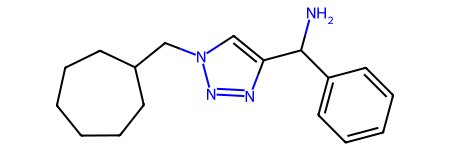

In [101]:
first_rxn_products['ATTAGGGATTAGTGCCCCCGTG']